In [ ]:
## import numpy as np
import matplotlib.pyplot as plt
from ase import Atoms
from dscribe.descriptors import SOAP

In [2]:
# Water (H₂O)
water = Atoms(
    symbols=["O", "H", "H"],2
    positions=[
        [0.000, 0.000, 0.000],   # Oxygen
        [0.758, 0.586, 0.000],   # Hydrogen 1
        [-0.758, 0.586, 0.000],  # Hydrogen 2
    ]
)

# Hydrogen Peroxide (H₂O₂)
hydrogen_peroxide = Atoms(
    symbols=["O", "O", "H", "H"],
    positions=[
        [0.000, 0.000, 0.000],   # Oxygen 1
        [1.45, 0.000, 0.000],    # Oxygen 2
        [0.500, 0.900, 0.000],   # Hydrogen 1
        [0.950, -0.900, 0.000],  # Hydrogen 2
    ]
)

h2 = Atoms("H2", positions=[[0, 0, 0], [0, 0, 0.74]])

# Visualize atomic positions
print("Water:")
for i, (el, pos) in enumerate(zip(water.get_chemical_symbols(), water.positions)):
    print(f"Atom {i}: {el}, Position: {pos}")

print("Hydrogen Peroxide:")
# Visualize atomic positions
for i, (el, pos) in enumerate(zip(hydrogen_peroxide.get_chemical_symbols(), hydrogen_peroxide.positions)):
    print(f"Atom {i}: {el}, Position: {pos}")


Water:
Atom 0: O, Position: [0. 0. 0.]
Atom 1: H, Position: [0.758 0.586 0.   ]
Atom 2: H, Position: [-0.758  0.586  0.   ]
Hydrogen Peroxide:
Atom 0: O, Position: [0. 0. 0.]
Atom 1: O, Position: [1.45 0.   0.  ]
Atom 2: H, Position: [0.5 0.9 0. ]
Atom 3: H, Position: [ 0.95 -0.9   0.  ]


In [3]:
# Define SOAP descriptor
soap = SOAP(
    # species=["H", "O"],
    # species = ["O", "H"],
    species=["H", "O", "C"],
    # species = ["H", "O"],
    periodic=False,
    r_cut=8.0,
    n_max=8,
    l_max=6,
    sigma=0.2
)

# Generate SOAP descriptors
soap_water = soap.create(water)
soap_h2o2 = soap.create(hydrogen_peroxide)
soap_hydrogen = soap.create(h2)

# print("SOAP shape (H₂O):", soap_water.shape)
# print("SOAP shape (H₂O₂):", soap_h2o2.shape)


In [4]:
print(soap.get_location(("H","H")))
print(soap.get_location(("H","C")))
print(soap.get_location(("H","O")))
print(soap.get_location(("C","C")))
print(soap.get_location(("C","O")))
print(soap.get_location(("O","O")))

slice(0, 252, None)
slice(252, 700, None)
slice(700, 1148, None)
slice(1148, 1400, None)
slice(1400, 1848, None)
slice(1848, 2100, None)


In [10]:
soap_water.shape

(3, 2100)

In [5]:
n_max=8
l_max=6
# species=["H", "C", "O"]
species = ["H", "O", "C"]

In [13]:
from columns import slice_column 

In [15]:
column = slice_column(soap, species)

In [17]:
len(column)

2100

In [6]:
col = []
count = 0
for i in range(len(species)):
    for j in range(i, len(species)):
        for l in range(l_max+1):
            for n in range(n_max):
                for n_ in range(n_max):
                    if (n_, j) >= (n, i):
                        col += [f"p(χ)^({species[i]} {species[j]})_({n} {n_} {l})"]
                    else:
                        col += [f"p(χ)^({species[j]} {species[i]})_({n_} {n} {l})"]
                    count += 1

In [8]:
count

2688

In [7]:
col

['p(χ)^(H H)_(0 0 0)',
 'p(χ)^(H H)_(0 1 0)',
 'p(χ)^(H H)_(0 2 0)',
 'p(χ)^(H H)_(0 3 0)',
 'p(χ)^(H H)_(0 4 0)',
 'p(χ)^(H H)_(0 5 0)',
 'p(χ)^(H H)_(0 6 0)',
 'p(χ)^(H H)_(0 7 0)',
 'p(χ)^(H H)_(0 1 0)',
 'p(χ)^(H H)_(1 1 0)',
 'p(χ)^(H H)_(1 2 0)',
 'p(χ)^(H H)_(1 3 0)',
 'p(χ)^(H H)_(1 4 0)',
 'p(χ)^(H H)_(1 5 0)',
 'p(χ)^(H H)_(1 6 0)',
 'p(χ)^(H H)_(1 7 0)',
 'p(χ)^(H H)_(0 2 0)',
 'p(χ)^(H H)_(1 2 0)',
 'p(χ)^(H H)_(2 2 0)',
 'p(χ)^(H H)_(2 3 0)',
 'p(χ)^(H H)_(2 4 0)',
 'p(χ)^(H H)_(2 5 0)',
 'p(χ)^(H H)_(2 6 0)',
 'p(χ)^(H H)_(2 7 0)',
 'p(χ)^(H H)_(0 3 0)',
 'p(χ)^(H H)_(1 3 0)',
 'p(χ)^(H H)_(2 3 0)',
 'p(χ)^(H H)_(3 3 0)',
 'p(χ)^(H H)_(3 4 0)',
 'p(χ)^(H H)_(3 5 0)',
 'p(χ)^(H H)_(3 6 0)',
 'p(χ)^(H H)_(3 7 0)',
 'p(χ)^(H H)_(0 4 0)',
 'p(χ)^(H H)_(1 4 0)',
 'p(χ)^(H H)_(2 4 0)',
 'p(χ)^(H H)_(3 4 0)',
 'p(χ)^(H H)_(4 4 0)',
 'p(χ)^(H H)_(4 5 0)',
 'p(χ)^(H H)_(4 6 0)',
 'p(χ)^(H H)_(4 7 0)',
 'p(χ)^(H H)_(0 5 0)',
 'p(χ)^(H H)_(1 5 0)',
 'p(χ)^(H H)_(2 5 0)',
 'p(χ)^(H H

In [115]:
col

['p(χ)^(H H)_(0 0 0)',
 'p(χ)^(H H)_(0 1 0)',
 'p(χ)^(H H)_(1 1 0)',
 'p(χ)^(H H)_(0 0 1)',
 'p(χ)^(H H)_(0 1 1)',
 'p(χ)^(H H)_(1 1 1)']

In [102]:
col

['p(χ)^(O O)_(0 0 0)',
 'p(χ)^(O O)_(0 1 0)',
 'p(χ)^(O O)_(1 1 0)',
 'p(χ)^(O O)_(0 0 1)',
 'p(χ)^(O O)_(0 1 1)',
 'p(χ)^(O O)_(1 1 1)',
 'p(χ)^(O H)_(0 0 0)',
 'p(χ)^(O H)_(0 1 0)',
 'p(χ)^(O H)_(1 1 0)',
 'p(χ)^(O H)_(0 0 1)',
 'p(χ)^(O H)_(0 1 1)',
 'p(χ)^(O H)_(1 1 1)',
 'p(χ)^(H O)_(0 1 0)',
 'p(χ)^(H O)_(0 1 1)',
 'p(χ)^(H H)_(0 0 0)',
 'p(χ)^(H H)_(0 1 0)',
 'p(χ)^(H H)_(1 1 0)',
 'p(χ)^(H H)_(0 0 1)',
 'p(χ)^(H H)_(0 1 1)',
 'p(χ)^(H H)_(1 1 1)']

In [99]:
col

['p(χ)^(H H)_(0 0 0)',
 'p(χ)^(H H)_(0 1 0)',
 'p(χ)^(H H)_(1 1 0)',
 'p(χ)^(H H)_(0 0 1)',
 'p(χ)^(H H)_(0 1 1)',
 'p(χ)^(H H)_(1 1 1)',
 'p(χ)^(H C)_(0 0 0)',
 'p(χ)^(H C)_(0 1 0)',
 'p(χ)^(H C)_(1 1 0)',
 'p(χ)^(H C)_(0 0 1)',
 'p(χ)^(H C)_(0 1 1)',
 'p(χ)^(H C)_(1 1 1)',
 'p(χ)^(H O)_(0 0 0)',
 'p(χ)^(H O)_(0 1 0)',
 'p(χ)^(H O)_(1 1 0)',
 'p(χ)^(H O)_(0 0 1)',
 'p(χ)^(H O)_(0 1 1)',
 'p(χ)^(H O)_(1 1 1)',
 'p(χ)^(C H)_(0 1 0)',
 'p(χ)^(C H)_(0 1 1)',
 'p(χ)^(C C)_(0 0 0)',
 'p(χ)^(C C)_(0 1 0)',
 'p(χ)^(C C)_(1 1 0)',
 'p(χ)^(C C)_(0 0 1)',
 'p(χ)^(C C)_(0 1 1)',
 'p(χ)^(C C)_(1 1 1)',
 'p(χ)^(C O)_(0 0 0)',
 'p(χ)^(C O)_(0 1 0)',
 'p(χ)^(C O)_(1 1 0)',
 'p(χ)^(C O)_(0 0 1)',
 'p(χ)^(C O)_(0 1 1)',
 'p(χ)^(C O)_(1 1 1)',
 'p(χ)^(O H)_(0 1 0)',
 'p(χ)^(O H)_(0 1 1)',
 'p(χ)^(O C)_(0 1 0)',
 'p(χ)^(O C)_(0 1 1)',
 'p(χ)^(O O)_(0 0 0)',
 'p(χ)^(O O)_(0 1 0)',
 'p(χ)^(O O)_(1 1 0)',
 'p(χ)^(O O)_(0 0 1)',
 'p(χ)^(O O)_(0 1 1)',
 'p(χ)^(O O)_(1 1 1)']

In [96]:
col

['p(χ)^(H H)_(0 0 0)',
 'p(χ)^(H H)_(0 1 0)',
 'p(χ)^(H H)_(1 1 0)',
 'p(χ)^(H H)_(0 0 1)',
 'p(χ)^(H H)_(0 1 1)',
 'p(χ)^(H H)_(1 1 1)',
 'p(χ)^(H O)_(0 0 0)',
 'p(χ)^(H O)_(0 1 0)',
 'p(χ)^(H O)_(1 1 0)',
 'p(χ)^(H O)_(0 0 1)',
 'p(χ)^(H O)_(0 1 1)',
 'p(χ)^(H O)_(1 1 1)',
 'p(χ)^(H C)_(0 0 0)',
 'p(χ)^(H C)_(0 1 0)',
 'p(χ)^(H C)_(1 1 0)',
 'p(χ)^(H C)_(0 0 1)',
 'p(χ)^(H C)_(0 1 1)',
 'p(χ)^(H C)_(1 1 1)',
 'p(χ)^(O H)_(0 1 0)',
 'p(χ)^(O H)_(0 1 1)',
 'p(χ)^(O O)_(0 0 0)',
 'p(χ)^(O O)_(0 1 0)',
 'p(χ)^(O O)_(1 1 0)',
 'p(χ)^(O O)_(0 0 1)',
 'p(χ)^(O O)_(0 1 1)',
 'p(χ)^(O O)_(1 1 1)',
 'p(χ)^(O C)_(0 0 0)',
 'p(χ)^(O C)_(0 1 0)',
 'p(χ)^(O C)_(1 1 0)',
 'p(χ)^(O C)_(0 0 1)',
 'p(χ)^(O C)_(0 1 1)',
 'p(χ)^(O C)_(1 1 1)',
 'p(χ)^(C H)_(0 1 0)',
 'p(χ)^(C H)_(0 1 1)',
 'p(χ)^(C O)_(0 1 0)',
 'p(χ)^(C O)_(0 1 1)',
 'p(χ)^(C C)_(0 0 0)',
 'p(χ)^(C C)_(0 1 0)',
 'p(χ)^(C C)_(1 1 0)',
 'p(χ)^(C C)_(0 0 1)',
 'p(χ)^(C C)_(0 1 1)',
 'p(χ)^(C C)_(1 1 1)']

In [89]:
count

20

In [121]:
import pandas as pd
df = pd.DataFrame(soap_hydrogen, columns = col)

In [109]:
col

['p(χ)^(H H)_(0 0 0)',
 'p(χ)^(H H)_(0 1 0)',
 'p(χ)^(H H)_(1 1 0)',
 'p(χ)^(H H)_(0 0 1)',
 'p(χ)^(H H)_(0 1 1)',
 'p(χ)^(H H)_(1 1 1)',
 'p(χ)^(H C)_(0 0 0)',
 'p(χ)^(H C)_(0 1 0)',
 'p(χ)^(H C)_(1 1 0)',
 'p(χ)^(H C)_(0 0 1)',
 'p(χ)^(H C)_(0 1 1)',
 'p(χ)^(H C)_(1 1 1)',
 'p(χ)^(H O)_(0 0 0)',
 'p(χ)^(H O)_(0 1 0)',
 'p(χ)^(H O)_(1 1 0)',
 'p(χ)^(H O)_(0 0 1)',
 'p(χ)^(H O)_(0 1 1)',
 'p(χ)^(H O)_(1 1 1)',
 'p(χ)^(C H)_(0 1 0)',
 'p(χ)^(C H)_(0 1 1)',
 'p(χ)^(C C)_(0 0 0)',
 'p(χ)^(C C)_(0 1 0)',
 'p(χ)^(C C)_(1 1 0)',
 'p(χ)^(C C)_(0 0 1)',
 'p(χ)^(C C)_(0 1 1)',
 'p(χ)^(C C)_(1 1 1)',
 'p(χ)^(C O)_(0 0 0)',
 'p(χ)^(C O)_(0 1 0)',
 'p(χ)^(C O)_(1 1 0)',
 'p(χ)^(C O)_(0 0 1)',
 'p(χ)^(C O)_(0 1 1)',
 'p(χ)^(C O)_(1 1 1)',
 'p(χ)^(O H)_(0 1 0)',
 'p(χ)^(O H)_(0 1 1)',
 'p(χ)^(O C)_(0 1 0)',
 'p(χ)^(O C)_(0 1 1)',
 'p(χ)^(O O)_(0 0 0)',
 'p(χ)^(O O)_(0 1 0)',
 'p(χ)^(O O)_(1 1 0)',
 'p(χ)^(O O)_(0 0 1)',
 'p(χ)^(O O)_(0 1 1)',
 'p(χ)^(O O)_(1 1 1)']

In [ ]:
not zero x 6 O H /H O/ H H/ O O
zero x 6 
zero x 2 
not zero x 6
not zero x 2 
zero x 6 C 
zero x 6 C
zero x 2 
not zero x 6

In [122]:
df

,p(χ)^(H H)_(0 0 0),p(χ)^(H H)_(0 1 0),p(χ)^(H H)_(1 1 0),p(χ)^(H H)_(0 0 1),p(χ)^(H H)_(0 1 1),p(χ)^(H H)_(1 1 1),p(χ)^(H O)_(0 0 0),p(χ)^(H O)_(0 1 0),p(χ)^(H O)_(1 1 0),p(χ)^(H O)_(0 0 1),p(χ)^(H O)_(0 1 1),p(χ)^(H O)_(1 1 1),p(χ)^(O H)_(0 1 0),p(χ)^(O H)_(0 1 1),p(χ)^(O O)_(0 0 0),p(χ)^(O O)_(0 1 0),p(χ)^(O O)_(1 1 0),p(χ)^(O O)_(0 0 1),p(χ)^(O O)_(0 1 1),p(χ)^(O O)_(1 1 1)
0,4.975271,5.395163,5.850493,0.212539,0.324204,0.494537,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.975271,5.395163,5.850493,0.212539,0.324204,0.494537,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [92]:
df.iloc[:,:10]

,p(χ)^(H H)_(0 0 0),p(χ)^(H H)_(0 1 0),p(χ)^(H H)_(1 1 0),p(χ)^(H H)_(0 0 1),p(χ)^(H H)_(0 1 1),p(χ)^(H H)_(1 1 1),p(χ)^(H O)_(0 0 0),p(χ)^(H O)_(0 1 0),p(χ)^(H O)_(1 1 0),p(χ)^(H O)_(0 0 1)
0,0.216614,0.973786,4.377646,0.135613,0.368515,1.001398,0.770426,0.595973,3.463443,2.679192
1,2.374160,3.134513,4.138379,0.000675,-0.022526,0.751730,0.358565,1.611927,0.473400,2.128166
2,2.374160,3.134513,4.138379,0.000675,-0.022526,0.751730,0.358565,1.611927,0.473400,2.128166


In [93]:
df.iloc[:,10:]

,p(χ)^(H O)_(0 1 1),p(χ)^(H O)_(1 1 1),p(χ)^(O H)_(0 1 0),p(χ)^(O H)_(0 1 1),p(χ)^(O O)_(0 0 0),p(χ)^(O O)_(0 1 0),p(χ)^(O O)_(1 1 0),p(χ)^(O O)_(0 0 1),p(χ)^(O O)_(0 1 1),p(χ)^(O O)_(1 1 1)
0,0.000000,0.000000,0.000000,0.000000,2.740158,2.119685,1.639710,0.00000,0.000000,0.00000
1,-0.006188,-0.016815,0.206502,0.561146,0.054153,0.243446,1.094411,0.09063,0.246277,0.66923
2,-0.006188,-0.016815,0.206502,0.561146,0.054153,0.243446,1.094411,0.09063,0.246277,0.66923


In [105]:
df.iloc[:,:10]

,p(χ)^(O O)_(0 0 0),p(χ)^(O O)_(0 1 0),p(χ)^(O O)_(1 1 0),p(χ)^(O O)_(0 0 1),p(χ)^(O O)_(0 1 1),p(χ)^(O O)_(1 1 1),p(χ)^(O H)_(0 0 0),p(χ)^(O H)_(0 1 0),p(χ)^(O H)_(1 1 0),p(χ)^(O H)_(0 0 1)
0,0.216614,0.973786,4.377646,0.135613,0.368515,1.001398,0.770426,0.595973,3.463443,2.679192
1,2.374160,3.134513,4.138379,0.000675,-0.022526,0.751730,0.358565,1.611927,0.473400,2.128166
2,2.374160,3.134513,4.138379,0.000675,-0.022526,0.751730,0.358565,1.611927,0.473400,2.128166


In [106]:
df.iloc[:,10:]

,p(χ)^(O H)_(0 1 1),p(χ)^(O H)_(1 1 1),p(χ)^(H O)_(0 1 0),p(χ)^(H O)_(0 1 1),p(χ)^(H H)_(0 0 0),p(χ)^(H H)_(0 1 0),p(χ)^(H H)_(1 1 0),p(χ)^(H H)_(0 0 1),p(χ)^(H H)_(0 1 1),p(χ)^(H H)_(1 1 1)
0,0.000000,0.000000,0.000000,0.000000,2.740158,2.119685,1.639710,0.00000,0.000000,0.00000
1,-0.006188,-0.016815,0.206502,0.561146,0.054153,0.243446,1.094411,0.09063,0.246277,0.66923
2,-0.006188,-0.016815,0.206502,0.561146,0.054153,0.243446,1.094411,0.09063,0.246277,0.66923


In [82]:
df.iloc[:,:14]

,p(χ)^(H H)_(0 0 0),p(χ)^(H H)_(0 1 0),p(χ)^(H H)_(1 1 0),p(χ)^(H H)_(0 0 1),p(χ)^(H H)_(0 1 1),p(χ)^(H H)_(1 1 1),p(χ)^(H C)_(0 0 0),p(χ)^(H C)_(0 1 0),p(χ)^(H C)_(1 1 0),p(χ)^(H C)_(0 0 1),p(χ)^(H C)_(0 1 1),p(χ)^(H C)_(1 1 1),p(χ)^(H O)_(0 0 0),p(χ)^(H O)_(0 1 0)
0,0.216614,0.973786,4.377646,0.135613,0.368515,1.001398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.374160,3.134513,4.138379,0.000675,-0.022526,0.751730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.374160,3.134513,4.138379,0.000675,-0.022526,0.751730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [81]:
df.iloc[:,14:28]

,p(χ)^(H O)_(1 1 0),p(χ)^(H O)_(0 0 1),p(χ)^(H O)_(0 1 1),p(χ)^(H O)_(1 1 1),p(χ)^(C H)_(0 1 0),p(χ)^(C H)_(0 1 1),p(χ)^(C C)_(0 0 0),p(χ)^(C C)_(0 1 0),p(χ)^(C C)_(1 1 0),p(χ)^(C C)_(0 0 1),p(χ)^(C C)_(0 1 1),p(χ)^(C C)_(1 1 1),p(χ)^(C O)_(0 0 0),p(χ)^(C O)_(0 1 0)
0,0.770426,0.595973,3.463443,2.679192,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.358565,1.611927,0.473400,2.128166,-0.006188,-0.016815,0.206502,0.561146,0.0,0.0,0.0,0.0,0.0,0.0
2,0.358565,1.611927,0.473400,2.128166,-0.006188,-0.016815,0.206502,0.561146,0.0,0.0,0.0,0.0,0.0,0.0


In [80]:
df.iloc[:,28:]

,p(χ)^(C O)_(1 1 0),p(χ)^(C O)_(0 0 1),p(χ)^(C O)_(0 1 1),p(χ)^(C O)_(1 1 1),p(χ)^(O H)_(0 1 0),p(χ)^(O H)_(0 1 1),p(χ)^(O C)_(0 1 0),p(χ)^(O C)_(0 1 1),p(χ)^(O O)_(0 0 0),p(χ)^(O O)_(0 1 0),p(χ)^(O O)_(1 1 0),p(χ)^(O O)_(0 0 1),p(χ)^(O O)_(0 1 1),p(χ)^(O O)_(1 1 1)
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.740158,2.119685,1.639710,0.00000,0.000000,0.00000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.054153,0.243446,1.094411,0.09063,0.246277,0.66923
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.054153,0.243446,1.094411,0.09063,0.246277,0.66923


In [22]:
col_names_dist

{'H_H': slice(0, 2, None), 'H_O': slice(2, 4, None), 'O_O': slice(4, 6, None)}

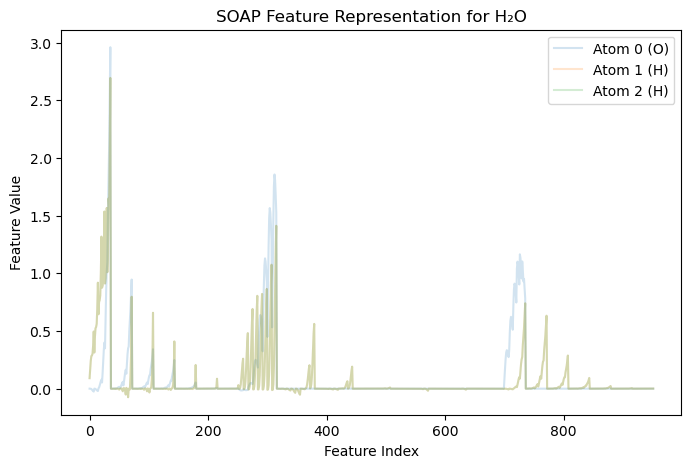

In [15]:
# Plot SOAP features for each atom
plt.figure(figsize=(8, 5))
for i in range(soap_features.shape[0]):
    plt.plot(soap_features[i], label=f'Atom {i} ({water.get_chemical_symbols()[i]})', alpha = 0.2)

plt.xlabel("Feature Index")
plt.ylabel("Feature Value")
plt.title("SOAP Feature Representation for H₂O")
plt.legend()
plt.show()


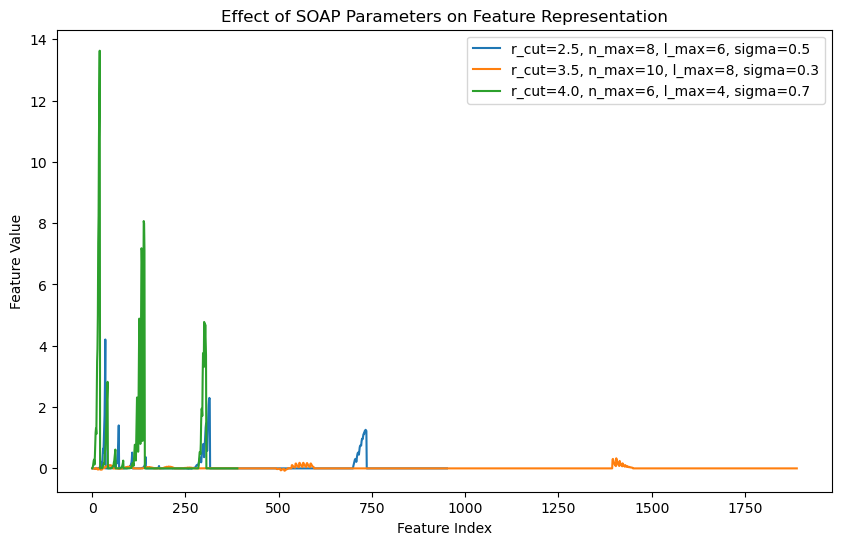

In [7]:
# Define different parameter sets
parameter_sets = [
    {"r_cut": 2.5, "n_max": 8, "l_max": 6, "sigma": 0.5},
    {"r_cut": 3.5, "n_max": 10, "l_max": 8, "sigma": 0.3},
    {"r_cut": 4.0, "n_max": 6, "l_max": 4, "sigma": 0.7},
]

# Generate and compare SOAP features for different parameters
plt.figure(figsize=(10, 6))

for i, params in enumerate(parameter_sets):
    soap = SOAP(
        species=["H", "O"],
        periodic=False,
        **params
    )
    features = soap.create(water)

    # Plot the SOAP features for Oxygen atom (index 0)
    plt.plot(features[0], label=f"r_cut={params['r_cut']}, n_max={params['n_max']}, l_max={params['l_max']}, sigma={params['sigma']}")

plt.xlabel("Feature Index")
plt.ylabel("Feature Value")
plt.title("Effect of SOAP Parameters on Feature Representation")
plt.legend()
plt.show()


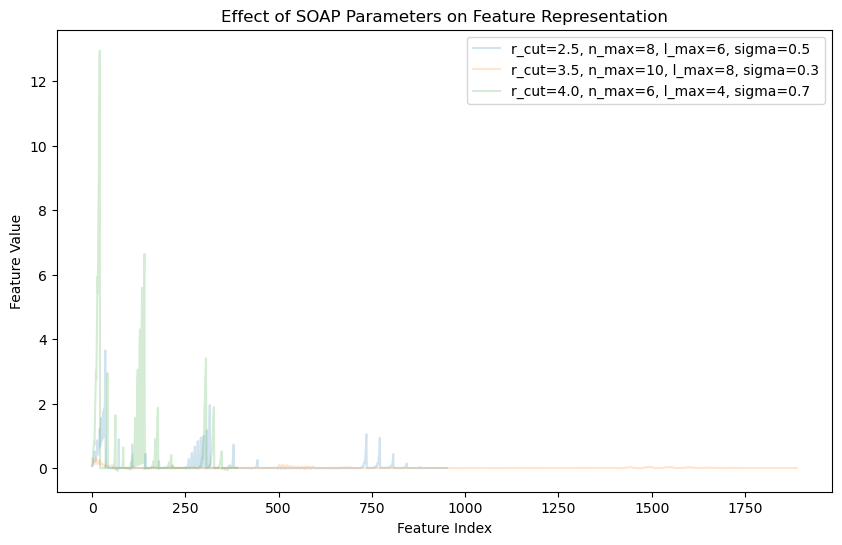

In [28]:
# Define different parameter sets
parameter_sets = [
    {"r_cut": 2.5, "n_max": 8, "l_max": 6, "sigma": 0.5},
    {"r_cut": 3.5, "n_max": 10, "l_max": 8, "sigma": 0.3},
    {"r_cut": 4.0, "n_max": 6, "l_max": 4, "sigma": 0.7},
]

# Generate and compare SOAP features for different parameters
plt.figure(figsize=(10, 6))

for i, params in enumerate(parameter_sets):
    soap = SOAP(
        species=["H", "O"],
        periodic=False,
        **params
    )
    features = soap.create(water)

    # Plot the SOAP features for Oxygen atom (index 0)
    plt.plot(features[1], label=f"r_cut={params['r_cut']}, n_max={params['n_max']}, l_max={params['l_max']}, sigma={params['sigma']}", alpha = 0.2)

plt.xlabel("Feature Index")
plt.ylabel("Feature Value")
plt.title("Effect of SOAP Parameters on Feature Representation")
plt.legend()
plt.show()

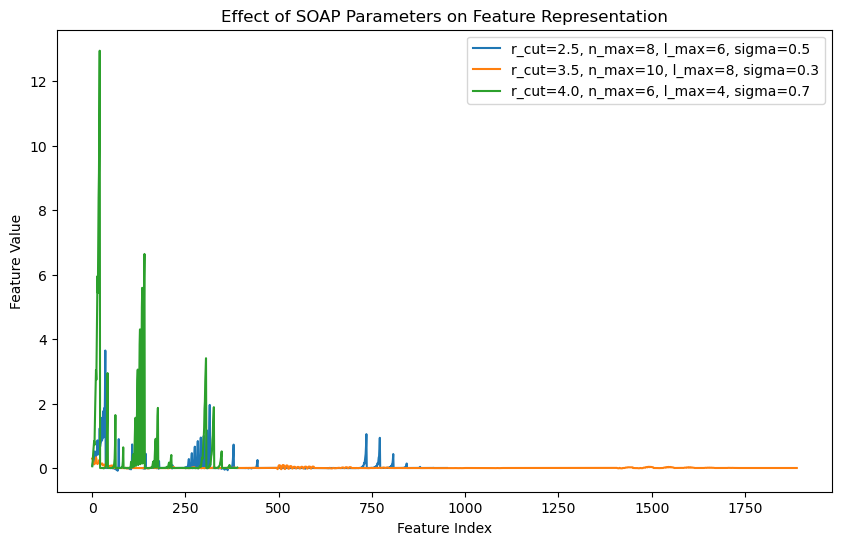

In [10]:
# Define different parameter sets
parameter_sets = [
    {"r_cut": 2.5, "n_max": 8, "l_max": 6, "sigma": 0.5},
    {"r_cut": 3.5, "n_max": 10, "l_max": 8, "sigma": 0.3},
    {"r_cut": 4.0, "n_max": 6, "l_max": 4, "sigma": 0.7},
]

# Generate and compare SOAP features for different parameters
plt.figure(figsize=(10, 6))

for i, params in enumerate(parameter_sets):
    soap = SOAP(
        species=["H", "O"],
        periodic=False,
        **params
    )
    features = soap.create(water)

    # Plot the SOAP features for Oxygen atom (index 0)
    plt.plot(features[2], label=f"r_cut={params['r_cut']}, n_max={params['n_max']}, l_max={params['l_max']}, sigma={params['sigma']}")

plt.xlabel("Feature Index")
plt.ylabel("Feature Value")
plt.title("Effect of SOAP Parameters on Feature Representation")
plt.legend()
plt.show()

In [8]:
print("Example SOAP Features (First Atom):", soap_features[0])


Example SOAP Features (First Atom): [ 2.10261994e-04  1.71237820e-04 -6.55049717e-04 -3.36529172e-03
 -8.57553385e-03 -1.51768429e-02 -2.10366404e-02 -2.49478229e-02
  1.39456449e-04 -5.33473897e-04 -2.74070081e-03 -6.98393320e-03
 -1.23600534e-02 -1.71322852e-02 -2.03175606e-02  2.04074033e-03
  1.04842218e-02  2.67161978e-02  4.72819002e-02  6.55374996e-02
  7.77223883e-02  5.38622702e-02  1.37253397e-01  2.42908871e-01
  3.36696282e-01  3.99295661e-01  3.49753084e-01  6.18987422e-01
  8.57979222e-01  1.01749677e+00  1.09547405e+00  1.51843792e+00
  1.80074954e+00  2.10470866e+00  2.49602113e+00  2.96008735e+00
  1.11092024e-05  5.54781358e-05  2.02748653e-04  5.62217426e-04
  1.20003685e-03  2.01502342e-03  2.75945235e-03  3.24211562e-03
  2.77051714e-04  1.01250450e-03  2.80765205e-03  5.99285217e-03
  1.00628056e-02  1.37804018e-02  1.61907691e-02  3.70026714e-03
  1.02607570e-02  2.19012894e-02  3.67752132e-02  5.03614238e-02
  5.91702766e-02  2.84528469e-02  6.07317797e-02  1.01

## Comparison between Water and Hydrogen Peroxide

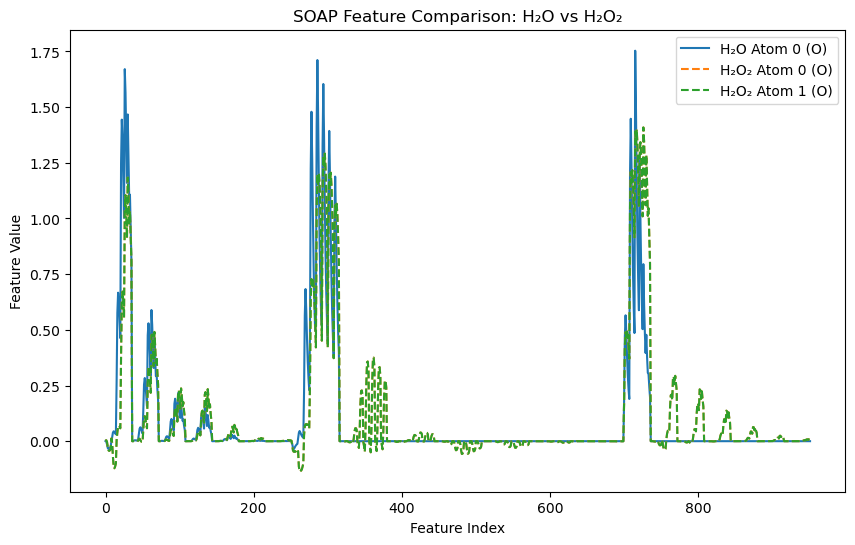

In [31]:
import matplotlib.pyplot as plt

# Plot SOAP features for all atoms in both molecules
plt.figure(figsize=(10, 6))

# for i in range(soap_water.shape[0]):
plt.plot(soap_water[0], label=f'H₂O Atom {0} ({water.get_chemical_symbols()[0]})')
# plt.plot(soap_water[2], label=f'H₂O Atom {2} ({water.get_chemical_symbols()[2]})')

# for i in range(soap_h2o2.shape[0]):
plt.plot(soap_h2o2[0], linestyle="dashed", label=f'H₂O₂ Atom {0} ({hydrogen_peroxide.get_chemical_symbols()[0]})')
plt.plot(soap_h2o2[1], linestyle="dashed", label=f'H₂O₂ Atom {1} ({hydrogen_peroxide.get_chemical_symbols()[1]})')


plt.xlabel("Feature Index")
plt.ylabel("Feature Value")
plt.title("SOAP Feature Comparison: H₂O vs H₂O₂")
plt.legend()
plt.show()


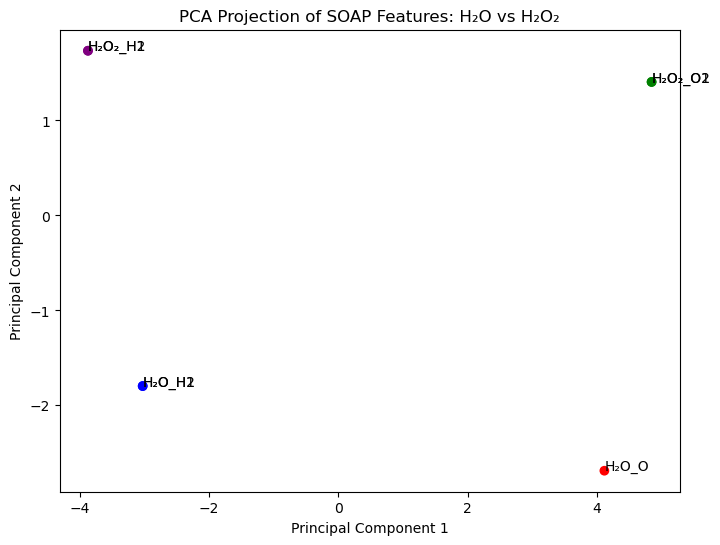

In [32]:
from sklearn.decomposition import PCA

# Combine both SOAP feature sets
soap_combined = np.vstack([soap_water, soap_h2o2])
labels = ["H₂O_O", "H₂O_H1", "H₂O_H2", "H₂O₂_O1", "H₂O₂_O2", "H₂O₂_H1", "H₂O₂_H2"]

# Perform PCA
pca = PCA(n_components=2)
soap_pca = pca.fit_transform(soap_combined)

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(soap_pca[:, 0], soap_pca[:, 1], c=["red", "blue", "blue", "green", "green", "purple", "purple"])
for i, txt in enumerate(labels):
    plt.annotate(txt, (soap_pca[i, 0], soap_pca[i, 1]))

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Projection of SOAP Features: H₂O vs H₂O₂")
plt.show()


## Methane

In [60]:
from ase import Atoms

# Define methane (CH₄)
methane = Atoms(
    symbols=["C", "H", "H", "H", "H"],
    positions=[
        [0.000, 0.000, 0.000],   # Carbon (center)
        [0.629, 0.629, 0.629],   # Hydrogen 1
        [-0.629, -0.629, 0.629], # Hydrogen 2
        [-0.629, 0.629, -0.629], # Hydrogen 3
        [0.629, -0.629, -0.629]  # Hydrogen 4
    ]
)



In [92]:
from dscribe.descriptors import SOAP
import numpy as np

species=["H", "C", "O"]
l_max = 1
n_max = 1
# Define SOAP descriptor
soap = SOAP(
    species=species,  # Elements in Methane
    periodic=False,
    r_cut=3.0,           # Cutoff radius (Å)
    n_max=n_max,             # Radial basis functions
    l_max=l_max,             # Angular channels
    sigma=0.5            # Gaussian width
)

# Generate SOAP descriptors
soap_methane = soap.create(methane)

# Print shape of the SOAP feature matrix
print("SOAP Feature Matrix Shape:", soap_methane.shape)  # Expected: (5 atoms, feature_dim)


SOAP Feature Matrix Shape: (5, 12)


In [2]:
from columns import columns

In [94]:
df_methane = pd.DataFrame(soap_methane, columns = columns(species, l_max, n_max))

In [95]:
df_methane

,p(χ)^(H H)_(0 0 0),p(χ)^(H H)_(0 0 1),p(χ)^(H C)_(0 0 0),p(χ)^(H C)_(0 0 1),p(χ)^(H O)_(0 0 0),p(χ)^(H O)_(0 0 1),p(χ)^(C C)_(0 0 0),p(χ)^(C C)_(0 0 1),p(χ)^(C O)_(0 0 0),p(χ)^(C O)_(0 0 1),p(χ)^(O O)_(0 0 0),p(χ)^(O O)_(0 0 1)
0,1.448215,0.00000,2.281650,0.000000,0.0,0.0,3.594722,0.000000,0.0,0.0,0.0,0.0
1,3.755661,0.00299,0.583042,0.016073,0.0,0.0,0.090513,0.086396,0.0,0.0,0.0,0.0
2,3.755661,0.00299,0.583042,0.016073,0.0,0.0,0.090513,0.086396,0.0,0.0,0.0,0.0
3,3.755661,0.00299,0.583042,0.016073,0.0,0.0,0.090513,0.086396,0.0,0.0,0.0,0.0
4,3.755661,0.00299,0.583042,0.016073,0.0,0.0,0.090513,0.086396,0.0,0.0,0.0,0.0


In [3]:
from rdkit import Chem
from rdkit.Chem import AllChem
from ase import Atoms

# Function: RDKit to ASE conversion
def smiles_to_ase(smiles):
    mol = Chem.MolFromSmiles(smiles)
    mol = Chem.AddHs(mol)
    AllChem.EmbedMolecule(mol, AllChem.ETKDG())
    AllChem.UFFOptimizeMolecule(mol)
    
    positions = []
    atomic_numbers = []
    conf = mol.GetConformer()
    
    for atom in mol.GetAtoms():
        pos = conf.GetAtomPosition(atom.GetIdx())
        positions.append([pos.x, pos.y, pos.z])
        atomic_numbers.append(atom.GetAtomicNum())
        
    return Atoms(numbers=atomic_numbers, positions=positions)

In [4]:
from ase.build import molecule

molecules_ase = {
    "Methanol (CH3OH)": molecule("CH3OH"),     # Methanol
    # "CH3NH2": molecule("CH3NH2"),   # Methylamine
    "Chloromethane (CH3Cl)": molecule("CH3Cl"),     # Chloromethane
    # "CH3Br": molecule("CH3Br"),     # Bromomethane
    # "CH3F": molecule("CH3F"),       # Fluoromethane
    "Ethane (C2H6)": molecule("C2H6")        # Ethane
}



In [14]:
smiles_dict = {
    "Methane (CH4)": "C",
    "Methanol (CH3OH)": "CO",
    "Methylamine (CH3NH2)": "CN",
    "Chloromethane (CH3Cl)": "CCl",
    "Bromomethane (CH3Br)": "CBr",
    "Fluoromethane (CH3F)": "CF",
    "Nitromethane (CH3NO2)": "C[N+](=O)[O-]",
    "Methanethiol (CH3SH)": "CS",
    "Acetic acid (CH3COOH)": "CC(=O)O",
    "Ethane (CH3CH3)": "CC",
    "Ethyl Bromide (CH3CH2Br)": "CCBr"
}

# Generate ASE atoms for each molecule
all_molecules = {name: smiles_to_ase(smiles) for name, smiles in smiles_dict.items()}

In [15]:
all_molecules = {**all_molecules, **molecules_ase}

In [16]:
all_molecules

{'Methane (CH4)': Atoms(symbols='CH4', pbc=False),
 'Methanol (CH3OH)': Atoms(symbols='COH4', pbc=False),
 'Methylamine (CH3NH2)': Atoms(symbols='CNH5', pbc=False),
 'Chloromethane (CH3Cl)': Atoms(symbols='CClH3', pbc=False),
 'Bromomethane (CH3Br)': Atoms(symbols='CBrH3', pbc=False),
 'Fluoromethane (CH3F)': Atoms(symbols='CFH3', pbc=False),
 'Nitromethane (CH3NO2)': Atoms(symbols='CNO2H3', pbc=False),
 'Methanethiol (CH3SH)': Atoms(symbols='CSH4', pbc=False),
 'Acetic acid (CH3COOH)': Atoms(symbols='C2O2H4', pbc=False),
 'Ethane (CH3CH3)': Atoms(symbols='C2H6', pbc=False),
 'Ethyl Bromide (CH3CH2Br)': Atoms(symbols='C2BrH5', pbc=False),
 'Ethane (C2H6)': Atoms(symbols='C2H6', pbc=False)}

In [18]:
from dscribe.descriptors import SOAP
# species=["H", "C", "O", "N", "Cl", "Br", "F", "S"]
species=["H", "C", "Br"]
l_max=1
n_max=1
soap = SOAP(
    species=species,
    periodic=False,
    r_cut=5.0,
    n_max=1,
    l_max=1,
    sparse=False
)

In [19]:
from columns import columns
import pandas as pd
desc = {}
i = 0
# for name, atoms in all_molecules.items():
#     desc[name] = soap.create(atoms)
#     print(f"{name}: SOAP shape = {desc[name].shape}")
#     desc[name] = pd.DataFrame(desc[name], columns = columns(species, l_max, n_max))
# desc["Chloromethane (CH3Cl)"] = 

In [20]:
desc["Ethyl Bromide (CH3CH2Br)"] = pd.DataFrame(soap.create(all_molecules["Ethyl Bromide (CH3CH2Br)"]), columns = columns(species, l_max, n_max))

In [21]:
desc["Ethyl Bromide (CH3CH2Br)"]

,p(χ)^(H H)_(0 0 0),p(χ)^(H H)_(0 0 1),p(χ)^(H C)_(0 0 0),p(χ)^(H C)_(0 0 1),p(χ)^(H Br)_(0 0 0),p(χ)^(H Br)_(0 0 1),p(χ)^(C C)_(0 0 0),p(χ)^(C C)_(0 0 1),p(χ)^(C Br)_(0 0 0),p(χ)^(C Br)_(0 0 1),p(χ)^(Br Br)_(0 0 0),p(χ)^(Br Br)_(0 0 1)
0,22.882180,0.027386,16.028820,-0.049818,0.273271,-0.007159,11.228086,0.121615,0.191425,0.011768,0.003264,0.001922
1,13.351737,0.180936,12.243956,0.050809,1.587557,-0.096521,11.228086,0.121615,1.455839,-0.027393,0.188765,0.051491
2,0.107324,0.040146,0.161049,0.053111,0.819036,0.000000,0.241669,0.070633,1.229038,0.000000,6.250434,0.000000
3,14.070265,0.256221,6.323748,0.263716,0.133229,0.002638,2.842149,0.307403,0.059879,0.007718,0.001262,0.000837
4,14.934380,0.275517,6.526961,0.284353,0.009843,0.001270,2.852560,0.308263,0.004302,0.001439,0.000006,0.000007
5,14.070262,0.256221,6.323741,0.263716,0.133228,0.002638,2.842143,0.307403,0.059878,0.007718,0.001261,0.000837
6,11.189231,0.132495,5.647837,0.187790,0.424854,0.009976,2.850782,0.308121,0.214448,0.028995,0.016132,0.007493
7,11.189222,0.132495,5.647827,0.187790,0.424851,0.009976,2.850775,0.308121,0.214446,0.028995,0.016131,0.007493


In [13]:
desc["Ethane (C2H6)"]

,p(χ)^(H H)_(0 0 0),p(χ)^(H H)_(0 0 1),p(χ)^(H C)_(0 0 0),p(χ)^(H C)_(0 0 1),p(χ)^(C C)_(0 0 0),p(χ)^(C C)_(0 0 1)
0,26.288377,0.000809,17.156392,-0.009892,11.196652,0.120894
1,26.288377,0.000809,17.156392,-0.009892,11.196652,0.120894
2,15.630265,0.315645,6.756845,0.302621,2.920933,0.307813
3,15.630262,0.315645,6.756841,0.302621,2.920930,0.307813
4,15.630262,0.315645,6.756841,0.302621,2.920930,0.307813
5,15.630265,0.315645,6.756845,0.302621,2.920933,0.307813
6,15.630262,0.315645,6.756841,0.302621,2.920930,0.307813
7,15.630262,0.315645,6.756841,0.302621,2.920930,0.307813


In [43]:
desc['Methane (CH4)']

,p(χ)^(H H)_(0 0 0),p(χ)^(H H)_(0 0 1),p(χ)^(H C)_(0 0 0),p(χ)^(H C)_(0 0 1),p(χ)^(H O)_(0 0 0),p(χ)^(H O)_(0 0 1),p(χ)^(C C)_(0 0 0),p(χ)^(C C)_(0 0 1),p(χ)^(C O)_(0 0 0),p(χ)^(C O)_(0 0 1),p(χ)^(O O)_(0 0 0),p(χ)^(O O)_(0 0 1)
0,31.738886,1.857851e-12,14.084808,0.000000,0.0,0.0,6.250434,0.00000,0.0,0.0,0.0,0.0
1,17.005159,4.192184e-01,5.807986,0.272738,0.0,0.0,1.983674,0.17744,0.0,0.0,0.0,0.0
2,17.005170,4.192186e-01,5.807994,0.272738,0.0,0.0,1.983679,0.17744,0.0,0.0,0.0,0.0
3,17.005216,4.192196e-01,5.808014,0.272739,0.0,0.0,1.983687,0.17744,0.0,0.0,0.0,0.0
4,17.005189,4.192190e-01,5.808001,0.272738,0.0,0.0,1.983682,0.17744,0.0,0.0,0.0,0.0


In [67]:
desc["Methanol (CH3OH)"]

,p(χ)^(H H)_(0 0 0),p(χ)^(H H)_(0 0 1),p(χ)^(H C)_(0 0 0),p(χ)^(H C)_(0 0 1),p(χ)^(H O)_(0 0 0),p(χ)^(H O)_(0 0 1),p(χ)^(C C)_(0 0 0),p(χ)^(C C)_(0 0 1),p(χ)^(C O)_(0 0 0),p(χ)^(C O)_(0 0 1),p(χ)^(O O)_(0 0 0),p(χ)^(O O)_(0 0 1)
0,22.261006,0.063647,11.795803,0.000000,4.589160,-0.090010,6.250434,0.000000,2.431733,0.000000,0.946066,0.139219
1,6.887791,0.277896,2.552706,0.136071,6.561379,0.000000,0.946066,0.139219,2.431733,0.000000,6.250434,0.000000
2,13.786370,0.257667,5.337083,0.205594,1.384590,0.053181,2.066132,0.178257,0.536013,0.063174,0.139057,0.041244
3,8.656006,0.069486,1.256126,0.057943,4.743405,0.063039,0.182284,0.050219,0.688344,0.067708,2.599339,0.177750
4,14.697770,0.271048,5.470412,0.217051,1.225484,0.064133,2.036051,0.177990,0.456117,0.059495,0.102179,0.032760
5,14.697770,0.271048,5.470412,0.217051,1.225484,0.064133,2.036051,0.177990,0.456117,0.059495,0.102179,0.032760


In [66]:
desc["Chloromethane (CH3Cl)"]

,p(χ)^(H H)_(0 0 0),p(χ)^(H H)_(0 0 1),p(χ)^(H C)_(0 0 0),p(χ)^(H C)_(0 0 1),p(χ)^(H Cl)_(0 0 0),p(χ)^(H Cl)_(0 0 1),p(χ)^(C C)_(0 0 0),p(χ)^(C C)_(0 0 1),p(χ)^(C Cl)_(0 0 0),p(χ)^(C Cl)_(0 0 1),p(χ)^(Cl Cl)_(0 0 0),p(χ)^(Cl Cl)_(0 0 1)
0,18.648517,0.168783,10.796358,0.000000,2.475269,-0.112833,6.250434,0.000000,1.433030,0.000000,0.328549,0.075430
1,0.304313,0.100364,0.316199,0.087008,1.379162,0.000000,0.328549,0.075430,1.433030,0.000000,6.250434,0.000000
2,13.221007,0.223578,5.233992,0.188871,0.668607,0.024127,2.072056,0.178306,0.264691,0.034843,0.033813,0.013755
3,13.221012,0.223578,5.233995,0.188871,0.668608,0.024127,2.072058,0.178306,0.264692,0.034843,0.033813,0.013755
4,13.221012,0.223578,5.233995,0.188871,0.668608,0.024127,2.072058,0.178306,0.264692,0.034843,0.033813,0.013755


In [71]:
desc["Bromomethane (CH3Br)"]

,p(χ)^(H H)_(0 0 0),p(χ)^(H H)_(0 0 1),p(χ)^(H C)_(0 0 0),p(χ)^(H C)_(0 0 1),p(χ)^(H Br)_(0 0 0),p(χ)^(H Br)_(0 0 1),p(χ)^(C C)_(0 0 0),p(χ)^(C C)_(0 0 1),p(χ)^(C Br)_(0 0 0),p(χ)^(C Br)_(0 0 1),p(χ)^(Br Br)_(0 0 0),p(χ)^(Br Br)_(0 0 1)
0,17.853124,0.177438,10.563606,0.000000,1.848716,-0.096065,6.250434,0.00000,1.093876,0.000000,0.191437,0.052010
1,0.144120,0.055565,0.166102,0.053758,0.949111,0.000000,0.191437,0.05201,1.093876,0.000000,6.250434,0.000000
2,12.834422,0.209609,5.045730,0.181825,0.453345,0.016337,1.983680,0.17744,0.178228,0.025204,0.016013,0.007447
3,12.834422,0.209609,5.045730,0.181825,0.453345,0.016337,1.983680,0.17744,0.178228,0.025204,0.016013,0.007447
4,12.834422,0.209609,5.045730,0.181825,0.453345,0.016337,1.983680,0.17744,0.178228,0.025204,0.016013,0.007447


In [62]:
all_molecules['Methanol (CH3OH)'][4]

Atom('H', [0.437145, 1.080376, 0.891772], index=4)

## misc

In [6]:
# Get the number of SOAP features per atom
num_features = soap_features.shape[1]

# Create feature names
feature_names = [f"SOAP_n{n}_l{l}" for n in range(8) for l in range(6)]

# Print the first few feature names
print("Feature Names:", feature_names[:])  # Display first 10 column names


Feature Names: ['SOAP_n0_l0', 'SOAP_n0_l1', 'SOAP_n0_l2', 'SOAP_n0_l3', 'SOAP_n0_l4', 'SOAP_n0_l5', 'SOAP_n1_l0', 'SOAP_n1_l1', 'SOAP_n1_l2', 'SOAP_n1_l3', 'SOAP_n1_l4', 'SOAP_n1_l5', 'SOAP_n2_l0', 'SOAP_n2_l1', 'SOAP_n2_l2', 'SOAP_n2_l3', 'SOAP_n2_l4', 'SOAP_n2_l5', 'SOAP_n3_l0', 'SOAP_n3_l1', 'SOAP_n3_l2', 'SOAP_n3_l3', 'SOAP_n3_l4', 'SOAP_n3_l5', 'SOAP_n4_l0', 'SOAP_n4_l1', 'SOAP_n4_l2', 'SOAP_n4_l3', 'SOAP_n4_l4', 'SOAP_n4_l5', 'SOAP_n5_l0', 'SOAP_n5_l1', 'SOAP_n5_l2', 'SOAP_n5_l3', 'SOAP_n5_l4', 'SOAP_n5_l5', 'SOAP_n6_l0', 'SOAP_n6_l1', 'SOAP_n6_l2', 'SOAP_n6_l3', 'SOAP_n6_l4', 'SOAP_n6_l5', 'SOAP_n7_l0', 'SOAP_n7_l1', 'SOAP_n7_l2', 'SOAP_n7_l3', 'SOAP_n7_l4', 'SOAP_n7_l5']


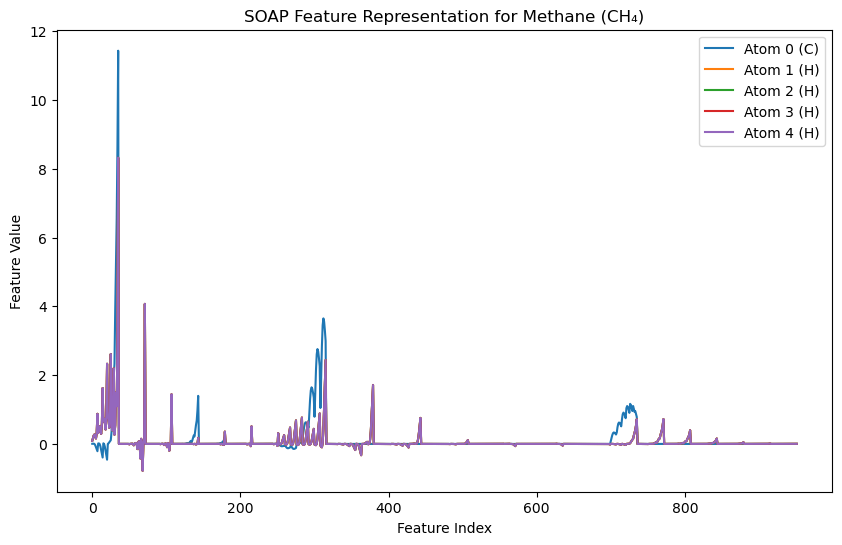

In [5]:
import matplotlib.pyplot as plt

# Plot SOAP features for Carbon and Hydrogen atoms
plt.figure(figsize=(10, 6))

for i in range(soap_features.shape[0]):
    plt.plot(soap_features[i], label=f'Atom {i} ({methane.get_chemical_symbols()[i]})')

plt.xlabel("Feature Index")
plt.ylabel("Feature Value")
plt.title("SOAP Feature Representation for Methane (CH₄)")
plt.legend()
plt.show()


## MOF

In [18]:
from ase.io import read
import pandas as pd
from columns import columns
import numpy as np
import matplotlib.pyplot as plt
from ase import Atoms
from dscribe.descriptors import SOAP

mof303 = read("CIF 2078717.cif")
mil47 = read("CIF 166785.cif")
mil53 = read("CIF 166784.cif")
mil62 = read("CIF 188871.cif")

/home/mmm9886/.conda/envs/pyemma/lib/python3.9/site-packages/ase/io/cif.py:408: UserWarning: crystal system 'monoclinic' is not interpreted for space group Spacegroup(14, setting=1). This may result in wrong setting!
  warnings.warn(
/home/mmm9886/.conda/envs/pyemma/lib/python3.9/site-packages/ase/io/cif.py:408: UserWarning: crystal system 'Orthorhombic' is not interpreted for space group Spacegroup(62, setting=1). This may result in wrong setting!
  warnings.warn(
/home/mmm9886/.conda/envs/pyemma/lib/python3.9/site-packages/ase/io/cif.py:408: UserWarning: crystal system 'Monoclinic' is not interpreted for space group Spacegroup(12, setting=1). This may result in wrong setting!
  warnings.warn(


In [19]:
speciesmof303 = sorted(set(mof303.get_chemical_symbols()))
speciesmil47 = sorted(set(mil47.get_chemical_symbols()))
speciesmil53 = sorted(set(mil53.get_chemical_symbols()))
speciesmil62 = sorted(set(mil62.get_chemical_symbols()))

In [3]:
speciesmof303

['Al', 'C', 'H', 'N', 'O']

In [4]:
speciesmil47

['C', 'H', 'O', 'V']

In [5]:
speciesmil53

['C', 'H', 'O', 'V']

In [21]:
speciesmil62

['C', 'Fe', 'H', 'O']

In [28]:
## from dscribe.descriptors import SOAP
# species=["H", "C", "O", "N", "Cl", "Br", "F", "S"]
# species = sorted(set(atoms.get_chemical_symbols()))
l_max=1
n_max=1
soap = SOAP(
    species=speciesmof303,
    periodic=False,
    r_cut=5.0,
    n_max=1,
    l_max=1,
    sparse=False
)

In [29]:
soap_mof303df = pd.DataFrame(soap.create(mof303), columns = columns(speciesmof303, l_max, n_max))

In [13]:
soap_mil47df = pd.DataFrame(soap.create(mil47), columns = columns(speciesmil47, l_max, n_max))
soap_mil53df = pd.DataFrame(soap.create(mil53), columns = columns(speciesmil53, l_max, n_max))

In [23]:
soap_mil62df = pd.DataFrame(soap.create(mil62), columns = columns(speciesmil62, l_max, n_max))

In [32]:
soap_mof303df['p(χ)^(C C)_(0 0 0)']

0      9.559550e-03
1      3.675421e-07
2      4.143974e-02
3      1.047601e-02
4      4.143974e-02
           ...     
123    2.216261e+01
124    2.246851e+01
125    2.246780e+01
126    2.246851e+01
127    2.246780e+01
Name: p(χ)^(C C)_(0 0 0), Length: 128, dtype: float64

In [31]:
soap_mil47df["p(χ)^(C C)_(0 0 0)"]

0     0.000007
1     0.000007
2     0.000007
3     0.000007
4     0.000022
        ...   
67    0.010283
68    0.037490
69    0.010283
70    0.037646
71    0.010283
Name: p(χ)^(C C)_(0 0 0), Length: 72, dtype: float64

In [33]:
soap_mil53df['p(χ)^(C C)_(0 0 0)']

0      3.921427e-07
1      1.748241e-06
2      3.921427e-07
3      6.970395e-06
4      1.040942e-05
           ...     
151    1.083783e-04
152    1.439884e-06
153    1.204754e-06
154    1.439884e-06
155    1.204754e-06
Name: p(χ)^(C C)_(0 0 0), Length: 156, dtype: float64

In [34]:
soap_mil62df['p(χ)^(C C)_(0 0 0)']

0     4.821721e-07
1     5.343807e-07
2     1.178837e-12
3     5.360410e-07
4     1.592376e-05
5     1.592376e-05
6     5.000645e-12
7     5.000645e-12
8     1.590555e-05
9     1.590555e-05
10    1.342813e-05
11    1.342813e-05
12    2.687497e-02
13    2.687497e-02
14    2.744039e-02
15    2.744039e-02
16    5.758278e-17
17    5.758278e-17
18    2.744039e-02
19    2.744039e-02
20    2.839022e+00
21    2.839022e+00
22    2.893471e+00
23    2.893471e+00
24    6.284753e+00
25    6.284753e+00
26    6.681945e+00
27    6.681945e+00
28    1.438233e-02
29    1.438233e-02
30    1.498942e-02
31    1.498942e-02
32    2.258008e-16
33    2.258008e-16
34    1.498943e-02
35    1.498943e-02
36    1.467271e-01
37    1.467271e-01
38    1.442083e-01
39    1.442083e-01
40    8.686914e-24
41    8.686914e-24
42    1.442083e-01
43    1.442083e-01
Name: p(χ)^(C C)_(0 0 0), dtype: float64

In [19]:
for i, atom in enumerate(mof303):
    print(f"Row {i}: Atom {atom.symbol}, Position: {atom.position}")

Row 0: Atom Al, Position: [-1.4574399   7.4675      6.88033124]
Row 1: Atom Al, Position: [-1.61808333e-16  0.00000000e+00  7.63870216e-16]
Row 2: Atom Al, Position: [7.55391729 6.46999135 7.77174695]
Row 3: Atom Al, Position: [ 0.10376301 13.93749135 12.86924676]
Row 4: Atom Al, Position: [1.56120291 8.46500865 5.98891552]
Row 5: Atom Al, Position: [9.01135719 0.99750865 0.89141572]
Row 6: Atom Al, Position: [4.5575601  7.4675     6.88033124]
Row 7: Atom Al, Position: [6.01500000e+00 0.00000000e+00 7.63870216e-16]
Row 8: Atom O, Position: [8.7399765  5.20439945 8.5122082 ]
Row 9: Atom O, Position: [-1.0822962  12.67189945 12.12878551]
Row 10: Atom O, Position: [0.3751437  9.73060055 5.24845427]
Row 11: Atom O, Position: [10.1974164   2.26310055  1.63187696]
Row 12: Atom O, Position: [ 1.31325527 13.277215   11.58179918]
Row 13: Atom O, Position: [6.34442503 5.809715   9.05919453]
Row 14: Atom O, Position: [7.80186493 1.657785   2.1788633 ]
Row 15: Atom O, Position: [2.77069517 9.12528

In [17]:
for i, atom in enumerate(mil47):
    print(f"Row {i}: Atom {atom.symbol}, Position: {atom.position}")

Row 0: Atom V, Position: [ 1.36494358  4.03575    10.30315124]
Row 1: Atom V, Position: [ 2.04400642 12.10725     3.33365124]
Row 2: Atom V, Position: [ 5.45295642 12.10725     3.63584876]
Row 3: Atom V, Position: [ 4.77389358  4.03575    10.60534876]
Row 4: Atom O, Position: [6.64813429 4.03575    9.6402124 ]
Row 5: Atom O, Position: [ 3.57871571 12.10725     2.6707124 ]
Row 6: Atom O, Position: [ 0.16976571 12.10725     4.2987876 ]
Row 7: Atom O, Position: [ 3.23918429  4.03575    11.2682876 ]
Row 8: Atom O, Position: [2.12582122 2.6345376  9.1370145 ]
Row 9: Atom O, Position: [ 1.28312878 13.5084624   2.1675145 ]
Row 10: Atom O, Position: [ 4.69207878 10.7060376   4.8019855 ]
Row 11: Atom O, Position: [ 5.53477122  5.4369624  11.7714855 ]
Row 12: Atom O, Position: [ 4.69207878 13.5084624   4.8019855 ]
Row 13: Atom O, Position: [ 5.53477122  2.6345376  11.7714855 ]
Row 14: Atom O, Position: [2.12582122 5.4369624  9.1370145 ]
Row 15: Atom O, Position: [ 1.28312878 10.7060376   2.16751

In [16]:
for i, atom in enumerate(mil53):
    print(f"Row {i}: Atom {atom.symbol}, Position: {atom.position}")

Row 0: Atom V, Position: [0. 0. 0.]
Row 1: Atom V, Position: [8.75925 0.      6.084  ]
Row 2: Atom V, Position: [0.     3.4375 0.    ]
Row 3: Atom V, Position: [8.75925 3.4375  6.084  ]
Row 4: Atom O, Position: [17.3993742  5.15625   11.261484 ]
Row 5: Atom O, Position: [8.8783758 1.71875   5.177484 ]
Row 6: Atom O, Position: [0.1191258 1.71875   0.906516 ]
Row 7: Atom O, Position: [8.6401242 5.15625   6.990516 ]
Row 8: Atom O, Position: [1.56545316 6.281      1.0853856 ]
Row 9: Atom O, Position: [7.19379684 0.594      7.1693856 ]
Row 10: Atom O, Position: [15.95304684  2.8435     11.0826144 ]
Row 11: Atom O, Position: [10.32470316  4.0315      4.9986144 ]
Row 12: Atom O, Position: [15.95304684  0.594      11.0826144 ]
Row 13: Atom O, Position: [10.32470316  6.281       4.9986144 ]
Row 14: Atom O, Position: [1.56545316 4.0315     1.0853856 ]
Row 15: Atom O, Position: [7.19379684 2.8435     7.1693856 ]
Row 16: Atom O, Position: [ 1.29619381  0.605      10.7723304 ]
Row 17: Atom O, Posit

In [25]:
for i, atom in enumerate(mil62):
    print(f"Row {i}: Atom {atom.symbol}, Position: {atom.position}")

Row 0: Atom Fe, Position: [0.         3.68296071 0.        ]
Row 1: Atom Fe, Position: [ 3.1189     12.47746071  0.        ]
Row 2: Atom Fe, Position: [ 0.         13.90603929  0.        ]
Row 3: Atom Fe, Position: [3.1189     5.11153929 0.        ]
Row 4: Atom O, Position: [1.06579847 5.30237994 0.86003943]
Row 5: Atom O, Position: [3.16368464 5.30237994 3.2827324 ]
Row 6: Atom O, Position: [ 4.18469847 14.09687994  0.86003943]
Row 7: Atom O, Position: [ 0.04478464 14.09687994  3.2827324 ]
Row 8: Atom O, Position: [ 3.16368464 12.28662006  3.2827324 ]
Row 9: Atom O, Position: [ 1.06579847 12.28662006  0.86003943]
Row 10: Atom O, Position: [0.04478464 3.49212006 3.2827324 ]
Row 11: Atom O, Position: [4.18469847 3.49212006 0.86003943]
Row 12: Atom O, Position: [0.59299667 2.34795561 1.44417026]
Row 13: Atom O, Position: [3.63648644 2.34795561 2.69860157]
Row 14: Atom O, Position: [ 3.71189667 11.14245561  1.44417026]
Row 15: Atom O, Position: [ 0.51758644 11.14245561  2.69860157]
Row 16

# MOF Files

In [6]:
from ase.io import read
import pandas as pd
from columns import columns
import numpy as np
import matplotlib.pyplot as plt
from ase import Atoms
from dscribe.descriptors import SOAP
import os
from tqdm import tqdm
from multiprocessing import Pool

In [22]:
l_max = 6
n_max = 8

In [24]:
def read_cif(file_path):
    try:
        structure = read(file_path)
        filename = os.path.basename(file_path)
        return filename, structure
    except Exception as e:
        filename = os.path.basename(file_path)
        return filename, f"Error: {e}"

def S(species):
    soap = SOAP(
        species=species,
        periodic=True,
        r_cut=5.0,
        n_max= 1,
        l_max= 1,
        sigma = 0.2,
        average = 'inner',
        sparse=False
    )
    return soap

In [18]:
i = 0
for k, v in species.items():
    print(i, v)
    i += 1

0 ['C', 'H', 'O', 'V']


In [19]:
def combine_lists(dict_of_lists, operation='union'):
    values = list(dict_of_lists.values())
    i = 0
    if not values:
        return []

    if operation == 'union':
        result = set()
        for lst in values:
            result.update(lst)
        return list(result)

    elif operation == 'intersection':
        result = set(values[0])
        for lst in values[1:]:
            result.intersection_update(lst)
            print(i, result)
            i += 1
        return list(result)

    else:
        raise ValueError("Operation must be 'union' or 'intersection'")



In [11]:
union_species = combine_lists(species)
inter_species = combine_lists(species, operation = "intersection")

0 {'H', 'C', 'O'}
1 {'H', 'C', 'O'}
2 {'H', 'C', 'O'}
3 {'H', 'C', 'O'}
4 {'H', 'C', 'O'}
5 {'H', 'C', 'O'}
6 {'H', 'C', 'O'}
7 {'H', 'C', 'O'}
8 {'H', 'C', 'O'}
9 {'H', 'C', 'O'}
10 {'H', 'C', 'O'}
11 {'H', 'C', 'O'}
12 {'H', 'C', 'O'}
13 {'H', 'C', 'O'}
14 {'H', 'C', 'O'}
15 {'H', 'C', 'O'}
16 {'H', 'C', 'O'}
17 {'H', 'C', 'O'}
18 {'H', 'C', 'O'}
19 {'H', 'C', 'O'}
20 {'H', 'C', 'O'}
21 {'H', 'C', 'O'}
22 {'H', 'C', 'O'}
23 {'H', 'C', 'O'}
24 {'H', 'C', 'O'}
25 {'H', 'C', 'O'}
26 {'H', 'C', 'O'}
27 {'H', 'C', 'O'}
28 {'H', 'C', 'O'}
29 {'O', 'C'}
30 {'O', 'C'}
31 {'O', 'C'}
32 {'O', 'C'}
33 {'O', 'C'}
34 {'O', 'C'}
35 {'O', 'C'}
36 {'O', 'C'}
37 {'O', 'C'}
38 {'O', 'C'}
39 {'O', 'C'}
40 {'O', 'C'}
41 {'O', 'C'}
42 {'O', 'C'}
43 {'O', 'C'}
44 {'O', 'C'}
45 {'O', 'C'}
46 {'O', 'C'}
47 {'O', 'C'}
48 {'O', 'C'}
49 {'O', 'C'}
50 {'O', 'C'}
51 {'O', 'C'}
52 {'O', 'C'}
53 {'O', 'C'}
54 {'O', 'C'}
55 {'O', 'C'}
56 {'O', 'C'}
57 {'O', 'C'}
58 {'O', 'C'}
59 {'O', 'C'}
60 {'O', 'C'}
61 {'O', 'C

In [12]:
inter_species

[]

In [13]:
len(union_species)

40

In [14]:
from collections import Counter

def element_frequencies(dict_of_lists):
    all_elements = []
    for lst in dict_of_lists.values():
        all_elements.extend(lst)
    
    freq = Counter(all_elements)
    return freq


In [15]:
element_frequencies(species)

Counter({'C': 3087,
         'H': 3062,
         'O': 3052,
         'N': 2439,
         'Zn': 1437,
         'Cu': 1034,
         'Li': 407,
         'Fe': 345,
         'Cl': 262,
         'F': 205,
         'S': 180,
         'Br': 128,
         'V': 109,
         'Co': 45,
         'I': 41,
         'Cd': 21,
         'Mn': 13,
         'Al': 13,
         'Pd': 11,
         'Ni': 9,
         'La': 8,
         'Er': 6,
         'Mg': 6,
         'Ce': 5,
         'Cr': 4,
         'Ti': 4,
         'Zr': 4,
         'Eu': 3,
         'Nd': 2,
         'Ca': 2,
         'P': 2,
         'Gd': 2,
         'Si': 2,
         'Sm': 2,
         'Sc': 1,
         'Ag': 1,
         'Y': 1,
         'In': 1,
         'Tb': 1,
         'Dy': 1})

In [22]:
union_species

['I',
 'La',
 'Sm',
 'Mn',
 'Zn',
 'Co',
 'Gd',
 'Ca',
 'Zr',
 'Ce',
 'C',
 'Cl',
 'Fe',
 'O',
 'In',
 'Y',
 'P',
 'Ag',
 'Sc',
 'Si',
 'Mg',
 'Br',
 'Eu',
 'Ni',
 'Li',
 'H',
 'Dy',
 'N',
 'Tb',
 'Cd',
 'V',
 'Nd',
 'Er',
 'Cu',
 'S',
 'Cr',
 'Ti',
 'Pd',
 'Al',
 'F']

In [30]:
s_species1 = ['C', 'O', 'H']

In [31]:
s_species1

['C', 'O', 'H']

In [20]:
folder_path = './CIF_files'
filenames = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

# with Pool() as pool:
#     for filename, structure in tqdm(pool.imap_unordered(read_cif, filenames), total=len(filenames), desc="Reading CIFs"):
#         species = sorted(set(structure.get_chemical_symbols()))
#         soap = S(species)
#         soap_df = pd.DataFrame(soap.create(structure), columns = columns(species, l_max, n_max))
#         soap_df.to_csv(f"./SOAP_descriptors/{filename}.csv", index=False)




mof_structures = {}
species = {}
dimensions = {}
dimensions_ = {}

# for filename in tqdm(filenames, desc="Processing files"):
#     mof_files[file_path] = read(file_path)


with Pool() as pool:
    for filename, structure in tqdm(pool.imap_unordered(read_cif, filenames), total=len(filenames), desc="Reading CIFs"):
        mof_structures[filename] = structure
        species[filename] = sorted(set(structure.get_chemical_symbols()))
        soap = S(species[filename])
        soap_df = pd.DataFrame(soap.create(mof_structures[filename]), columns = columns(species[filename], l_max, n_max))
        dimensions[filename] = soap_df.shape
        dimensions_[filename] = soap_df.shape[0]*soap_df.shape[1]
        # soap_df.to_csv(f"./SOAP_descriptors/{filename}.csv", index=False)

Reading CIFs:   0%|          | 0/3089 [00:00<?, ?it/s]/home/mmm9886/.conda/envs/pyemma/lib/python3.9/site-packages/ase/io/cif.py:408: UserWarning: crystal system 'triclinic' is not interpreted for space group Spacegroup(1, setting=1). This may result in wrong setting!
  warnings.warn(
/home/mmm9886/.conda/envs/pyemma/lib/python3.9/site-packages/ase/io/cif.py:408: UserWarning: crystal system 'triclinic' is not interpreted for space group Spacegroup(1, setting=1). This may result in wrong setting!
  warnings.warn(
/home/mmm9886/.conda/envs/pyemma/lib/python3.9/site-packages/ase/io/cif.py:408: UserWarning: crystal system 'triclinic' is not interpreted for space group Spacegroup(1, setting=1). This may result in wrong setting!
  warnings.warn(
/home/mmm9886/.conda/envs/pyemma/lib/python3.9/site-packages/ase/io/cif.py:408: UserWarning: crystal system 'triclinic' is not interpreted for space group Spacegroup(1, setting=1). This may result in wrong setting!
  warnings.warn(
/home/mmm9886/.con

ValueError: Shape of passed values is (30, 1), indices imply (30, 30)

In [26]:
folder_path = './CIF_files'
filenames = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

In [36]:
filename, structure = read_cif(filenames[0])
species[filename] = sorted(set(structure.get_chemical_symbols()))

In [39]:
soap = S(species[filename]) 

In [42]:
t = soap.create(structure)

In [44]:
t.shape

(5740,)

In [46]:
columns = columns(species[filename], l_max, n_max)

In [48]:
len(columns)

6720

In [51]:
columns

['p(χ)^(C C)_(0 0 0)',
 'p(χ)^(C C)_(0 1 0)',
 'p(χ)^(C C)_(0 2 0)',
 'p(χ)^(C C)_(0 3 0)',
 'p(χ)^(C C)_(0 4 0)',
 'p(χ)^(C C)_(0 5 0)',
 'p(χ)^(C C)_(0 6 0)',
 'p(χ)^(C C)_(0 7 0)',
 'p(χ)^(C C)_(0 1 0)',
 'p(χ)^(C C)_(1 1 0)',
 'p(χ)^(C C)_(1 2 0)',
 'p(χ)^(C C)_(1 3 0)',
 'p(χ)^(C C)_(1 4 0)',
 'p(χ)^(C C)_(1 5 0)',
 'p(χ)^(C C)_(1 6 0)',
 'p(χ)^(C C)_(1 7 0)',
 'p(χ)^(C C)_(0 2 0)',
 'p(χ)^(C C)_(1 2 0)',
 'p(χ)^(C C)_(2 2 0)',
 'p(χ)^(C C)_(2 3 0)',
 'p(χ)^(C C)_(2 4 0)',
 'p(χ)^(C C)_(2 5 0)',
 'p(χ)^(C C)_(2 6 0)',
 'p(χ)^(C C)_(2 7 0)',
 'p(χ)^(C C)_(0 3 0)',
 'p(χ)^(C C)_(1 3 0)',
 'p(χ)^(C C)_(2 3 0)',
 'p(χ)^(C C)_(3 3 0)',
 'p(χ)^(C C)_(3 4 0)',
 'p(χ)^(C C)_(3 5 0)',
 'p(χ)^(C C)_(3 6 0)',
 'p(χ)^(C C)_(3 7 0)',
 'p(χ)^(C C)_(0 4 0)',
 'p(χ)^(C C)_(1 4 0)',
 'p(χ)^(C C)_(2 4 0)',
 'p(χ)^(C C)_(3 4 0)',
 'p(χ)^(C C)_(4 4 0)',
 'p(χ)^(C C)_(4 5 0)',
 'p(χ)^(C C)_(4 6 0)',
 'p(χ)^(C C)_(4 7 0)',
 'p(χ)^(C C)_(0 5 0)',
 'p(χ)^(C C)_(1 5 0)',
 'p(χ)^(C C)_(2 5 0)',
 'p(χ)^(C C

In [54]:
soap.get_location(("H","H"))

slice(0, 252, None)

In [25]:
folder_path = './CIF_files'
filenames = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

soap_df = pd.DataFrame()

mof_structures = {}
species = {}


# for filename in tqdm(filenames, desc="Processing files"):
#     mof_files[file_path] = read(file_path)


with Pool() as pool:
    for filename, structure in tqdm(pool.imap_unordered(read_cif, filenames), total=len(filenames), desc="Reading CIFs"):
        mof_structures[filename] = structure
        species[filename] = sorted(set(structure.get_chemical_symbols()))
        soap = S(species[filename])  
        df = pd.DataFrame([soap.create(mof_structures[filename]).flatten()], columns = columns(species[filename], l_max, n_max))
        df['filename'] = filename
        df = df.reindex(columns=soap_df.columns.union(df.columns, sort=False), fill_value=0)
        soap_df = soap_df.reindex(columns=df.columns.union(soap_df.columns, sort=False), fill_value=0)
        soap_df = pd.concat([soap_df, df], ignore_index=True)


# with Pool() as pool:
#     for filename, descriptors in tqdm(pool.imap_unordered(compute_soap, mof_items), total=len(mof_items), desc="Creating SOAP descriptors"):
#         df = pd.DataFrame(descriptors)
#         # df["filename"] = filename  # Optional: track origin
#         df = df.reindex(columns=soap_df.columns, fill_value=0)
    
#         # Step 2: Reindex final_df to match any new columns from new_row_df
#         soap_df = soap_df.reindex(columns=df.columns.union(soap_df.columns, sort=False), fill_value=0)
    
#         # Step 3: Concat the new row
#         soap_df = pd.concat([soap_df, df], ignore_index=True)


Reading CIFs:   0%|          | 0/3089 [00:00<?, ?it/s]/home/mmm9886/.conda/envs/pyemma/lib/python3.9/site-packages/ase/io/cif.py:408: UserWarning: crystal system 'triclinic' is not interpreted for space group Spacegroup(1, setting=1). This may result in wrong setting!
  warnings.warn(
/home/mmm9886/.conda/envs/pyemma/lib/python3.9/site-packages/ase/io/cif.py:408: UserWarning: crystal system 'triclinic' is not interpreted for space group Spacegroup(1, setting=1). This may result in wrong setting!
  warnings.warn(
/home/mmm9886/.conda/envs/pyemma/lib/python3.9/site-packages/ase/io/cif.py:408: UserWarning: crystal system 'triclinic' is not interpreted for space group Spacegroup(1, setting=1). This may result in wrong setting!
  warnings.warn(
/home/mmm9886/.conda/envs/pyemma/lib/python3.9/site-packages/ase/io/cif.py:408: UserWarning: crystal system 'triclinic' is not interpreted for space group Spacegroup(1, setting=1). This may result in wrong setting!
  warnings.warn(
/home/mmm9886/.con

ValueError: 4480 columns passed, passed data had 3696 columns

In [26]:
cols = ['filename'] + [col for col in soap_df.columns if col != 'filename']
soap_df = soap_df[cols]

In [27]:
soap_df

,filename,p(χ)^(C C)_(0 0 0),p(χ)^(C C)_(0 0 1),p(χ)^(C H)_(0 0 0),p(χ)^(C H)_(0 0 1),p(χ)^(C O)_(0 0 0),p(χ)^(C O)_(0 0 1),p(χ)^(C V)_(0 0 0),p(χ)^(C V)_(0 0 1),p(χ)^(H H)_(0 0 0),...,p(χ)^(Dy N)_(0 0 0),p(χ)^(Dy N)_(0 0 1),p(χ)^(Dy O)_(0 0 0),p(χ)^(Dy O)_(0 0 1),p(χ)^(Al F)_(0 0 0),p(χ)^(Al F)_(0 0 1),p(χ)^(Br Co)_(0 0 0),p(χ)^(Br Co)_(0 0 1),p(χ)^(F Ti)_(0 0 0),p(χ)^(F Ti)_(0 0 1)
0,DB0-m9_o5_o13_f0_sra_repeat.cif,0.606729,4.104813e-04,1.960778,-9.536714e-04,0.768790,4.918767e-04,0.169485,0.000051,6.336679,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,DB5-hypotheticalMOF_6023_3_0_0_10_21_0_repeat.cif,0.736904,4.036080e-04,2.533212,-4.034135e-04,0.868532,1.417755e-04,0.000000,0.000000,8.708271,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,DB0-m3_o150_o6_f0_fsc.sym.12_repeat.cif,1.169435,2.121687e-08,2.936747,-4.895232e-09,0.929966,-1.669589e-08,0.000000,0.000000,7.374917,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,DB0-m3_o24_o151_f0_fsc.sym.16_repeat.cif,0.919702,5.012132e-06,0.219880,5.165943e-10,0.337257,-7.402103e-06,0.000000,0.000000,0.052568,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,DB0-m3_o4_o17_f0_pcu.sym.25_repeat.cif,1.710465,9.264885e-05,0.219773,8.412303e-06,0.163256,-7.735092e-05,0.000000,0.000000,0.028238,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3084,DB0-m3_o2_o27_f0_nbo.sym.118_repeat.cif,2.285045,7.242410e-06,4.044318,-1.888676e-05,0.810040,2.695410e-06,0.000000,0.000000,7.158067,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3085,DB0-m3_o17_o22_f0_nbo.sym.4_repeat.cif,2.917701,1.242761e-04,5.303754,-8.139386e-05,0.806482,-2.937743e-05,0.000000,0.000000,9.641085,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3086,DB0-m3_o22_o27_f0_nbo.sym.100_repeat.cif,4.955978,1.266652e-05,6.528851,-8.282360e-06,1.853285,-3.110868e-06,0.000000,0.000000,8.600906,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3087,DB0-m3_o25_o27_f0_nbo.sym.98_repeat.cif,2.317266,2.360571e-06,5.271056,1.576728e-05,0.828933,-1.148460e-05,0.000000,0.000000,11.990008,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
soap_df.to_csv("soap_descriptors.csv", index=False)

In [10]:
soap.create(mof_structures['DB0-m9_o5_o13_f0_sra_repeat.cif'])

array([ 6.06729326e-01,  4.10481295e-04,  1.96077769e+00, -9.53671397e-04,
        7.68789549e-01,  4.91876675e-04,  1.69485256e-01,  5.13134266e-05,
        6.33667928e+00,  2.23935263e-03,  2.48451053e+00, -1.17976236e-03,
        5.47728444e-01, -1.05918877e-04,  9.74136812e-01,  6.52226143e-04,
        2.14755556e-01,  3.56595378e-05,  4.73444268e-02,  1.89459123e-05])

In [11]:
columns(species['DB0-m9_o5_o13_f0_sra_repeat.cif'], l_max, n_max)

['p(χ)^(C C)_(0 0 0)',
 'p(χ)^(C C)_(0 0 1)',
 'p(χ)^(C H)_(0 0 0)',
 'p(χ)^(C H)_(0 0 1)',
 'p(χ)^(C O)_(0 0 0)',
 'p(χ)^(C O)_(0 0 1)',
 'p(χ)^(C V)_(0 0 0)',
 'p(χ)^(C V)_(0 0 1)',
 'p(χ)^(H H)_(0 0 0)',
 'p(χ)^(H H)_(0 0 1)',
 'p(χ)^(H O)_(0 0 0)',
 'p(χ)^(H O)_(0 0 1)',
 'p(χ)^(H V)_(0 0 0)',
 'p(χ)^(H V)_(0 0 1)',
 'p(χ)^(O O)_(0 0 0)',
 'p(χ)^(O O)_(0 0 1)',
 'p(χ)^(O V)_(0 0 0)',
 'p(χ)^(O V)_(0 0 1)',
 'p(χ)^(V V)_(0 0 0)',
 'p(χ)^(V V)_(0 0 1)']

In [29]:
soap.species

['C', 'H', 'O']

In [ ]:
soap_df.to_csv(f"./SOAP_descriptors/{filename}.csv", index=False)

In [41]:
s = 40
lm = 1
nm = 1
count = 0
for i in range(s):
    for j in range(s):
        for l in range(lm+1):
            for n in range(nm):
                for n_ in range(nm):
                    if (n_, j) >= (n, i):
                        count += 1
print(count)

1640


In [ ]:
column_numbers = 